In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow.keras as keras

print(os.listdir("/"))

['home', 'usr', 'bin', 'sbin', '.file', 'etc', 'var', 'Library', 'System', '.VolumeIcon.icns', 'private', '.vol', 'Users', 'Applications', 'opt', 'dev', 'Volumes', 'tmp', 'cores']


In [2]:
#import sys
#!{sys.executable} -m pip install opencv-python

In [3]:
povtorka = "/Users/Andrew/Downloads/dataset/povtorka/"
ne_povtorka = "/Users/Andrew/Downloads/dataset/ne_povtorka"


In [4]:
povtorka_path = os.listdir(povtorka)
ne_povtorka_path = os.listdir(ne_povtorka)

In [5]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]

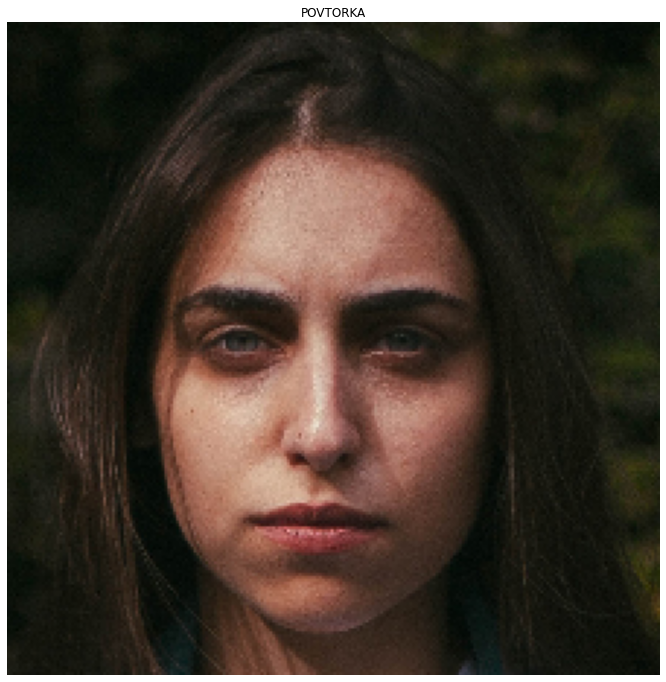

In [6]:
fig = plt.figure(figsize=(12, 12))

for i in range(1):
    plt.subplot(1, 1, i+1)
    plt.imshow(load_img(povtorka + povtorka_path[i]), cmap='gray')
    plt.title("POVTORKA")
    plt.axis('off')

plt.show()

In [7]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   )

In [8]:
dataset_path = "dataset2"

In [9]:
train = train_datagen.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32)

Found 553 images belonging to 2 classes.


In [10]:
mobilenetV2 = MobileNetV2(input_shape=(96, 96, 3),
                          include_top=False,
                          weights='imagenet'
                          )

average_layer = GlobalAveragePooling2D()

model = Sequential([
    mobilenetV2,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [13]:
model.fit_generator(train,
                    epochs=50,
                    callbacks=[lr_callbacks])

/Users/Andrew/jupyter/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
18/18 [==============================] - 15s 587ms/step - loss: 1.0882 - accuracy: 0.5481
Epoch 2/50
18/18 [==============================] - 11s 571ms/step - loss: 0.6893 - accuracy: 0.6869
Epoch 3/50
18/18 [==============================] - 11s 593ms/step - loss: 0.4955 - accuracy: 0.7714
Epoch 4/50
18/18 [==============================] - 11s 590ms/step - loss: 0.3298 - accuracy: 0.8918
Epoch 5/50
18/18 [==============================] - 11s 621ms/step - loss: 0.3313 - accuracy: 0.8686
Epoch 6/50
18/18 [==============================] - 11s 593ms/step - loss: 0.2836 - accuracy: 0.9403
Epoch 7/50
18/18 [==============================] - 11s 600ms/step - loss: 0.2862 - accuracy: 0.9143
Epoch 8/50
18/18 [==============================] - 12s 667ms/step - loss: 0.2484 - accuracy: 0.9364
Epoch 9/50
18/18 [==============================] - 11s 584ms/step - loss: 0.2348 - accuracy: 0.9643
Epoch 10/50
18/18 [==============================] - 11s 567ms/step - loss: 0.2663 - accura

In [14]:
model.evaluate_generator(train)

/Users/Andrew/jupyter/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.11113544553518295, 0.9927667379379272]

In [49]:
test_path = "Test"
test = train_datagen.flow_from_directory(test_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32)

Found 1 images belonging to 1 classes.


In [64]:
var = model.predict(test)

In [44]:
type(var)

numpy.ndarray

In [65]:
print(var)

[[0.11856054 0.88143945]]


In [61]:
model = keras.models.load_model("model.h5")

In [66]:
res = np.argmax(var, axis = 1)

In [63]:
type(res)

numpy.ndarray

In [67]:
if res == 0:
    print('Survived')
else:
    print('Povtorka')

Povtorka
